### Time Series Forecasting using LSTM and GRU
In this notebook will use LSTM & GRU for predicting the price of stocks of Google for the year 2017

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Helper Functions for Plotting Predictions and Calculating RMSE

In [27]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Getting the data

In [3]:
# First, we get the data
dataset = pd.read_csv('/content/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [9]:
dataset.shape

(3019, 6)

Slpitting dataset to train set (Before 2017) and test set (2017 and beyond)

In [28]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

Visualizing the data

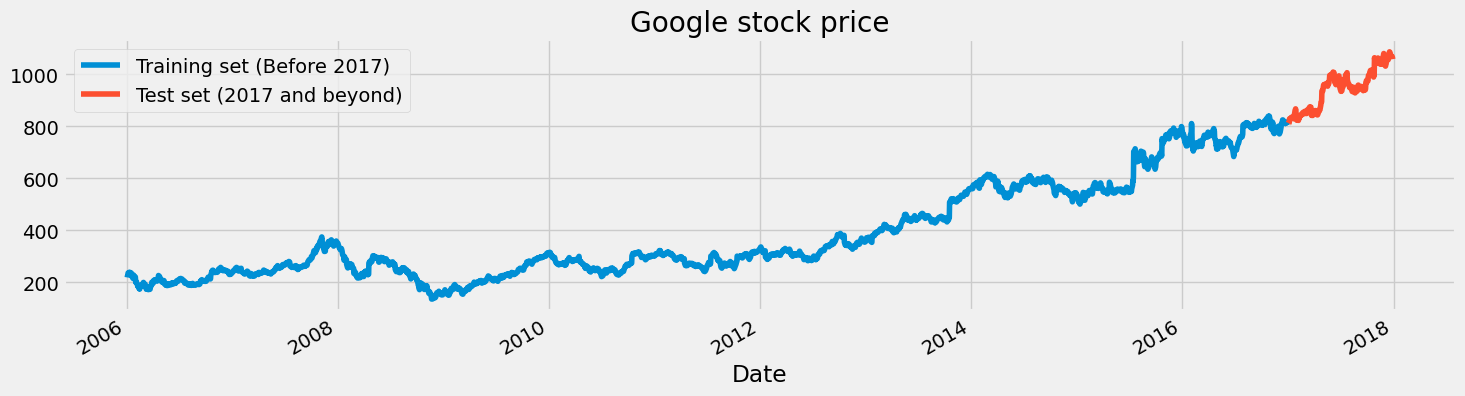

In [29]:
# We have chosen 'High' attribute for prices.
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Google stock price')
plt.show()

## Data Preprocessing

Scaling the training set

In [23]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So for each element of training set, we have 60 previous training set elements

In [24]:
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping X_train for efficient modelling

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM Model

In [26]:
# The LSTM architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - loss: 0.0228
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - loss: 0.0063
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - loss: 0.0056
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - loss: 0.0051
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - loss: 0.0038
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - loss: 0.0040
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - loss: 0.0034
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - loss: 0.0031
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - loss: 0.0033
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 0.0031
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - loss: 0.0027
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - loss: 0.0026
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - loss: 0.0025
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - loss: 0.0023
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 


## Make preductuion with LSTM model

In [13]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [14]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


Visualizing the results

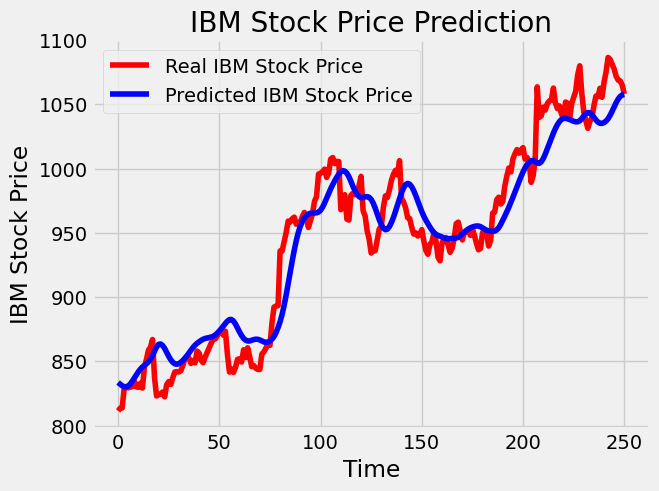

In [15]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

Evaluating LSMT Model

In [31]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 21.48247676329251.


## GRU Model

In [17]:
# The GRU architecture
regressorGRU = Sequential()

# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 378ms/step - loss: 0.1350
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - loss: 0.0435
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - loss: 0.0106
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - loss: 0.0038
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - loss: 0.0028
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - loss: 0.0023
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - loss: 0.0027
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - loss: 0.0024
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - loss: 0.0023
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - loss: 0.0024
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step - loss: 0.0024
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 400ms/step - loss: 0.0024
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - loss: 0.0024
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 292ms/step - loss: 0.0019
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step - los


## Make preductuion with GRU model

In [18]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step


Visualizing the Results

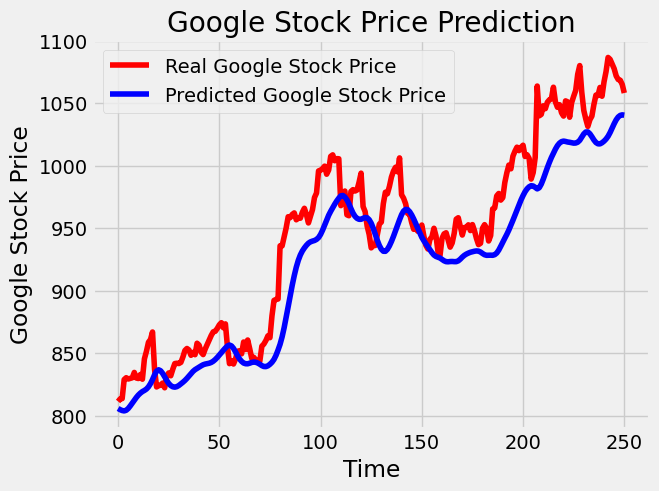

In [30]:
plot_predictions(test_set,GRU_predicted_stock_price)

Evaluating GRU Model

In [32]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 31.359586206926505.
